<a href="https://colab.research.google.com/github/pooya-mohammadi/deep-utils-notebooks/blob/main/augmentation/cutmix/cutmix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep-Utils
## A toolkit for deep-learning practitioners! 

This reposito
ry contains the most frequently used deep learning models and functions. Deep_Utils is still under heavy development, so take into consideration that many features may change in the future. Install the latest version using pypi.

# Installation

In [1]:
!pip install deep_utils[cv2]
# make sure to restart the colab session after installation of a new `opencv` version!

# CutMix Segmentation On Two images

In [28]:
import cv2
import numpy as np
from PIL import Image
from deep_utils import CutMixAug, group_show, repeat_dimension

# Create two sample images

In [30]:
image_a = np.zeros((300, 300, 3), np.uint8) * 255
mask_a = np.zeros_like(image_a)
pt1 = (150, 100)
pt2 = (100, 200)
pt3 = (200, 200)


triangle_cnt = np.array( [pt1, pt2, pt3] )

image_a = cv2.drawContours(image_a, [triangle_cnt], 0, (0,255,0), -1)
mask_a = cv2.drawContours(mask_a, [triangle_cnt], 0, (255, 255, 255), -1)

image_b = np.zeros((300, 300, 3), np.uint8) * 255
mask_b = np.zeros_like(image_b)

pt1 = (150, 150)

image_b = cv2.circle(image_b, pt1, 50, (0,255,0), -1)
mask_b = cv2.circle(mask_b, pt1, 50, (255, 255, 255), -1)

## Visualize images

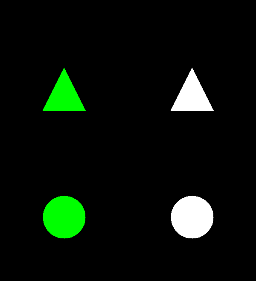

In [21]:
# Get group image
group_img = group_show(np.array([image_a, mask_a, image_b, mask_b]))

# show group image
Image.fromarray(group_img[..., ::-1])

In [24]:
cutmix_img, cutmix_mask = CutMixAug.seg_cutmix(image_a, mask_a[...,0], image_b, mask_b[...,0], beta=1)

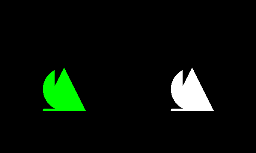

In [29]:
# Get group image
group_img = group_show(np.array([cutmix_img, repeat_dimension(cutmix_mask)]))

# show group image
Image.fromarray(group_img[..., ::-1])

# CutMix Segmentation On a batch of images
**Note** the inputs b_images and b_masks can be different from a_images and a_masks 

In [39]:
# Get a third image
image_c = np.zeros((300, 300, 3), np.uint8) * 255
mask_c = np.zeros_like(image_c)

pt1 = (100, 100)
pt2 = (200, 200)

image_c = cv2.rectangle(image_c, pt1, pt2, (0, 255, 0), -1)
mask_c = cv2.rectangle(mask_c, pt1, pt2, color=(255, 255, 255), thickness= -1)

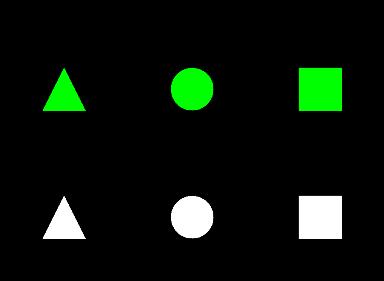

In [52]:
# Get batch images
batch_img = np.array([image_a, image_b, image_c])
batch_mask = np.array([mask_a, mask_b, mask_c])

# Get group image
group_img = group_show(np.array([*batch_img, *batch_mask]))

# Save image
cv2.imwrite("batch_img.jpg", group_img)
# show group image
Image.fromarray(group_img[..., ::-1])


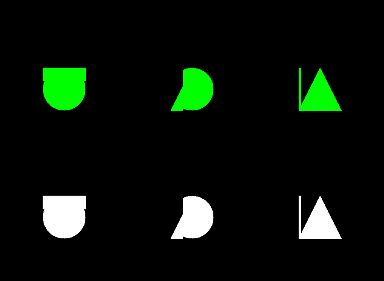

In [61]:
cutmix_img, cutmix_mask = CutMixAug.seg_cutmix_batch(a_images=batch_img, a_masks=batch_mask[...,0], beta=1)
# Get group image
group_img = group_show(np.array([*cutmix_img, *[repeat_dimension(m) for m in cutmix_mask]]))

# Save image
cv2.imwrite("batch_cutmix.jpg", group_img)

# show group image
Image.fromarray(group_img[..., ::-1])